In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *

In [2]:
spec_names=('gap', 'shifted_gap', 'log10_gap', 'log10_shifted_gap', 'ratio')

In [92]:
dim_loc=3
L=4
n_dis=100
tau = np.roll(np.identity(3), -1, axis=1)
simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
time_set= np.power(2, np.arange(40))
h = 2*np.pi/(3*np.sqrt(3))+0.01
initial_state=np.zeros(dim_loc**L)
initial_state[0]=1
idata={'JZZ': 1.0, 'hZ': 0.1, 'hX': 0.1, 'm':1.0, 'h': np.pi*2/(3*np.sqrt(3)), 'alphas': np.array([1,0]),\
       'betas': np.ones(dim_loc-1), 'lambdas': np.ones(dim_loc-1),\
       'h': h}
filename='clock3_'+str(L)+'.txt'

In [93]:
clockH, clockK, clockZ = clock(dim_loc, L)
Z_mean, Z_var, spectral_data, spectral_data_var = simulation(dim_loc, L, n_dis, idata, clockH, clockK, clockZ, initial_state, time_set)

with open(filename, 'wb') as f:
        for key, value in simdict.items():
            f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
        for key, value in idata.items():
            f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
        for i in range(5):
            f.write(('\n# '+spec_names[i]+' '+str(spectral_data[i])+' '+str(spectral_data_var[i])).encode('utf-8'))
        f.write('\n# time\tRe(Z)\Im(Z)\tVar(Re(Z))\tVar(Im(Z))\n'.encode('utf-8'))
        np.savetxt(f, np.stack((time_set, np.real(Z_mean), np.imag(Z_mean), np.real(Z_var), np.imag(Z_var)), axis=-1))

size 4 	disorder realization 0 	time elapsed 0.1333911418914795
size 4 	disorder realization 1 	time elapsed 0.09444379806518555
size 4 	disorder realization 2 	time elapsed 0.09324407577514648
size 4 	disorder realization 3 	time elapsed 0.10287618637084961
size 4 	disorder realization 4 	time elapsed 0.10034060478210449
size 4 	disorder realization 5 	time elapsed 0.0989997386932373
size 4 	disorder realization 6 	time elapsed 0.10362362861633301
size 4 	disorder realization 7 	time elapsed 0.09830141067504883
size 4 	disorder realization 8 	time elapsed 0.09356236457824707
size 4 	disorder realization 9 	time elapsed 0.1083991527557373
size 4 	disorder realization 10 	time elapsed 0.10297679901123047
size 4 	disorder realization 11 	time elapsed 0.09487700462341309
size 4 	disorder realization 12 	time elapsed 0.11093974113464355
size 4 	disorder realization 13 	time elapsed 0.09230566024780273
size 4 	disorder realization 14 	time elapsed 0.09213423728942871
size 4 	disorder realiz

In [94]:
import re

lenarr=len(time_set)

dt = np.dtype([('JZZ', np.float64), ('hZ', np.float64), ('hX', np.float64), 
               ('FILENAME', np.unicode_, 32), ('phi', np.float64), ('dim_loc', np.int32),
               ('n_dis', np.int32), ('L', np.int32), ('time_set', np.float64, (lenarr,)),
               ('ReZ', np.float64, (lenarr,)), ('ImZ', np.float64, (lenarr,)), ('ReVarZ', np.float64, (lenarr,)),
               ('ImVarZ', np.float64, (lenarr,))])

def get_data(file):
    d = np.zeros([], dtype=dt)
    d['FILENAME']=file
    with open(file) as f:
        for line in f:
            try:
                m = re.match("# (\S+) ([-+]?\d+.\d+e[+-]?\d+)", line)
                d[m.group(1)]=float(m.group(2))
            except:
                try:
                    m = re.match("# (\S+) ([-+]?\d+.\d+)", line)
                    d[m.group(1)]=float(m.group(2))                  
                except:
                    try:
                        m = re.match("# (\S+) (\d+)", line)
                        d[m.group(1)]=int(m.group(2))                       
                    except: pass
    d['time_set'], d['ReZ'], d['ImZ'], d['ReVarZ'], d['ImVarZ']=np.genfromtxt(file, unpack=True, dtype=np.float64)
    return d


In [95]:
dataset=np.empty(0, dtype=dt)
for L in [2,3,4]:
    d=get_data('clock3_%d.txt' %L)
    dataset=np.append(dataset, d)

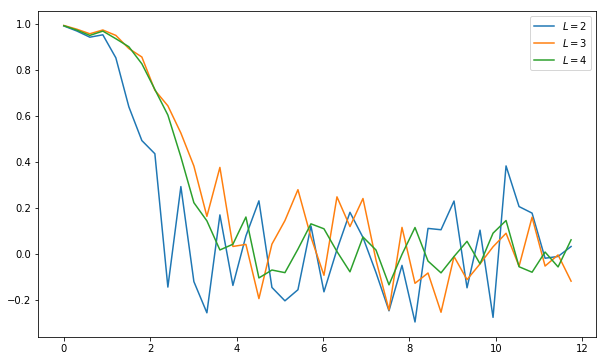

In [96]:
f, ax = plt.subplots(1,1,figsize=(10,6))

for sim in dataset:
    ax.plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % sim['L'])
plt.legend()

plt.show()

In [6]:
def get_data(file):
    d = np.zeros([], dtype=dt)
    d['FILENAME']=file
    with open(file) as f:
        for line in f:
            try:
                m = re.match("# (\S+) ([-+]?\d+.\d+e[+-]?\d+)", line)
                d[m.group(1)]=float(m.group(2))
            except:
                try:
                    m = re.match("# (\S+) ([-+]?\d+.\d+)", line)
                    d[m.group(1)]=float(m.group(2))                  
                except:
                    try:
                        m = re.match("# (\S+) (\d+)", line)
                        d[m.group(1)]=int(m.group(2))                       
                    except: pass
    d['time_set'], d['ReZ'], d['ImZ'], Varz=np.genfromtxt(file, unpack=True, dtype=np.complex128)
    return d

In [7]:
dataset=np.empty(0, dtype=dt)
for L in range(2,7):
    d=get_data('pertkick/Z_02_0%d.dat' %L)
    dataset=np.append(dataset, d)

TypeError: data type not understood

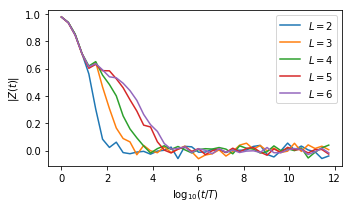

In [28]:
f, ax = plt.subplots(1,1,figsize=(5,3))

for sim in dataset:
    ax.plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % sim['L'])

ax.set_xlabel(r'$\log_{10} (t/T)$')
ax.set_ylabel(r'$|Z(t)|$')
ax.legend()
plt.tight_layout()
#plt.show()
#plt.savefig('pertkick/pertkick2.eps')

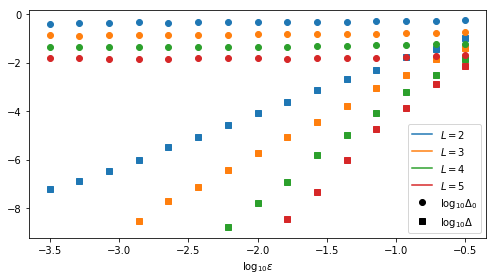

In [49]:
f2, ax2 = plt.subplots(1,1,figsize=(7,4))
phivec=np.array([np.pi/24, np.pi/12, np.pi/8, np.pi/6, -np.pi/24, -np.pi/12, -np.pi/8, -np.pi/6])

phinum=2

linesym=[]

for L in range(2,6):
    epsilon, gaps, shifted_gaps, log10_gaps, log10_shifted_gaps, ratio,\
    var_gaps, var_shifted_gaps, var_log10_gaps, var_log10_shifted_gaps, var_ratio\
        = np.loadtxt('pertkick_spectrum/spectrum_07_0%d.dat' %L, unpack=True)
    ax2.plot(np.log10(epsilon), log10_shifted_gaps,label= r'$L=$%d' % L, color='C%d' %(L-2),marker='s', linestyle='')
    ax2.plot(np.log10(epsilon), log10_gaps, marker='o', color='C%d' %(L-2), linestyle='')
    linesym.append(plt.Line2D((0,1),(0,0), color='C%d' %(L-2)))


#Get artists and labels for legend and chose which ones to display
handles, labels = ax2.get_legend_handles_labels()
labels, linesym = zip(*sorted(zip(labels, linesym), key=lambda t: t[0]))

#Create custom artists
symo = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
syms = plt.Line2D((0,1),(0,0), color='k', marker='s', linestyle='')

#Create legend from custom artist/label lists
#figleg, axleg=plt.subplots(nrows=1, figsize=(2,2.5))
#axleg.axis('off')
#legend=axleg.legend(list(linesym)+[symo, syms], list(labels)+['$\log_{10}\Delta_0$', '$\log_{10}\Delta$'], loc='upper center', shadow=False, numpoints=1)
legend=ax2.legend(list(linesym)+[symo, syms], list(labels)+['$\log_{10}\Delta_0$', '$\log_{10}\Delta$'], loc='lower right', shadow=False, numpoints=1)
    
ax2.set_xlabel(r'$\log_{10} \epsilon$')
plt.tight_layout()    